In [14]:
import pandas as pd

# Load raw dataset
df = pd.read_csv("student_performance_2000.csv")

# Preview the data
print(df.head())
print(df.info())


  Student_ID  Student_Name  Gender  Age  Attendance (%)  GPA (last semester)  \
0    SML0001   Kiara Mehta    Male   19            58.0                 5.45   
1    SCS0002     Sai Verma  Female   24            80.0                 5.51   
2    SCS0003  Aditya Kumar  Female   25            44.0                 6.23   
3    SAI0004    Myra Patel  Female   17            69.0                 6.94   
4    SDS0005      Myra Rao    Male   19            82.0                 7.60   

   Study_Hours/week  Participation (%)  Assignments_Score  Midterm_Score  \
0              12.8               28.0               60.0           69.0   
1              17.0               34.0               53.0           69.0   
2              15.3               42.0               58.0           67.0   
3              10.1               46.0               89.0           76.0   
4              19.4               57.0               61.0           81.0   

   Final_Score Internet_Access Part_time_Job Dropout_Risk  
0 

In [15]:
# Remove duplicates
df.drop_duplicates(inplace=True)

print(df.isnull().sum())

df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


Student_ID             0
Student_Name           0
Gender                 0
Age                    0
Attendance (%)         0
GPA (last semester)    0
Study_Hours/week       0
Participation (%)      0
Assignments_Score      0
Midterm_Score          0
Final_Score            0
Internet_Access        0
Part_time_Job          0
Dropout_Risk           0
dtype: int64


In [16]:
# Check value distributions
print(df['Gender'].value_counts())
print(df['Internet_Access'].value_counts())


Gender
Female    970
Male      944
Other      86
Name: count, dtype: int64
Internet_Access
Yes    1428
No      572
Name: count, dtype: int64


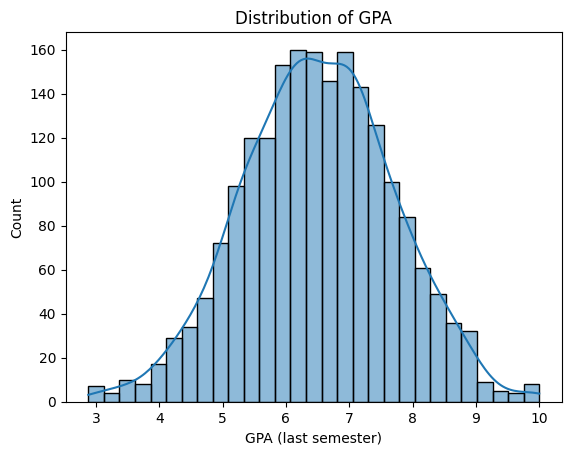

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['GPA (last semester)'], kde=True)
plt.title("Distribution of GPA")
plt.show()


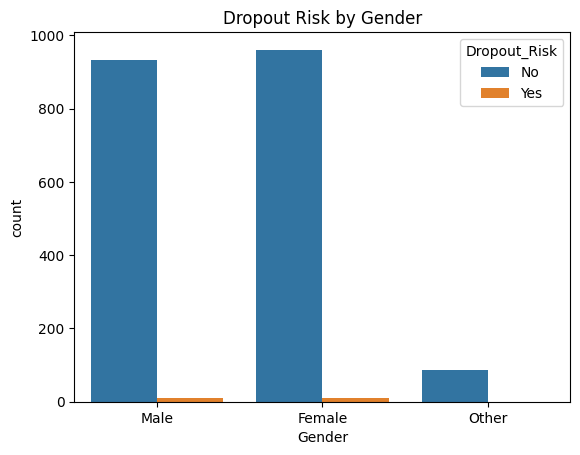

In [18]:
sns.countplot(x='Gender', hue='Dropout_Risk', data=df)
plt.title("Dropout Risk by Gender")
plt.show()


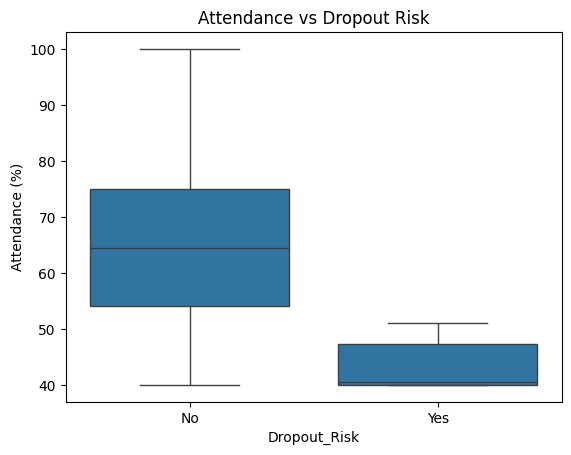

In [19]:
sns.boxplot(x='Dropout_Risk', y='Attendance (%)', data=df)
plt.title("Attendance vs Dropout Risk")
plt.show()


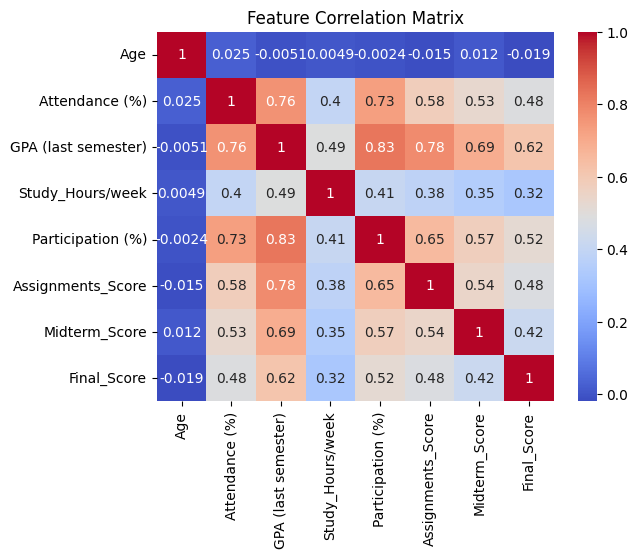

In [20]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


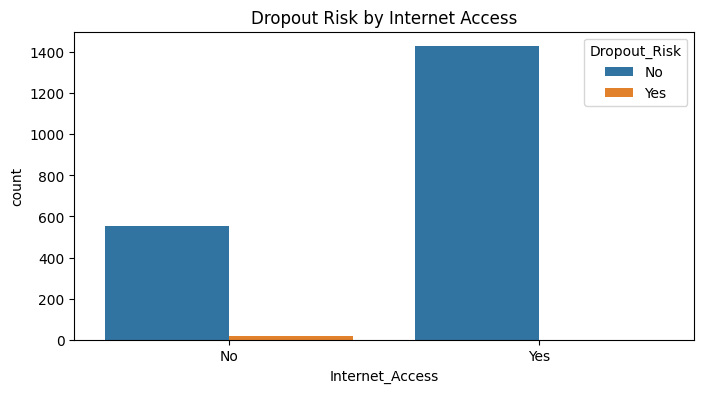

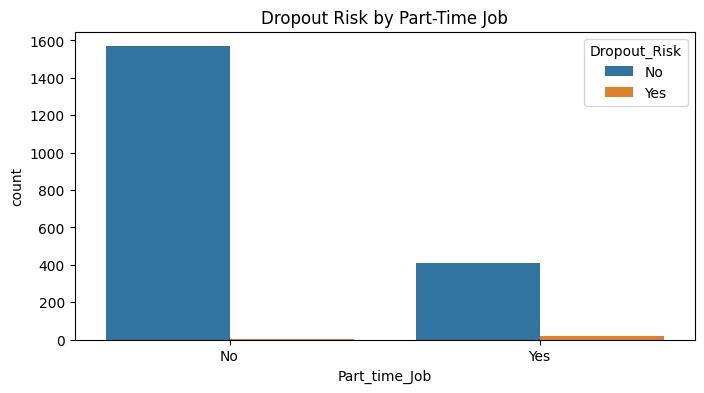

In [21]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Internet_Access', hue='Dropout_Risk', data=df)
plt.title("Dropout Risk by Internet Access")
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='Part_time_Job', hue='Dropout_Risk', data=df)
plt.title("Dropout Risk by Part-Time Job")
plt.show()


In [22]:
# Average of exam scores
df['Average_Score'] = df[['Assignments_Score', 'Midterm_Score', 'Final_Score']].mean(axis=1)

# GPA category
df['GPA_Level'] = pd.cut(df['GPA (last semester)'],
                         bins=[0, 4.5, 7.5, 10],
                         labels=['Low', 'Medium', 'High'])

# Export the enriched cleaned dataset for Excel dashboard
df.to_csv("student_cleaned_ready_for_dashboard.csv", index=False)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df.drop(columns=['Student_ID', 'Student_Name', 'Dropout_Risk', 'GPA_Level'])
X = pd.get_dummies(X, drop_first=True)
y = df['Dropout_Risk'].map({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       394
           1       1.00      0.50      0.67         6

    accuracy                           0.99       400
   macro avg       1.00      0.75      0.83       400
weighted avg       0.99      0.99      0.99       400



In [24]:
# Export predictions
X_test_copy = X_test.copy()
X_test_copy['Actual'] = y_test.values
X_test_copy['Predicted'] = preds
X_test_copy.to_csv("model_predictions.csv", index=False)

# Export feature importance
feat_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
feat_df.to_csv("feature_importance.csv", index=False)
